In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path=r"C:\Users\vinays\Downloads\health_lifestyle_classification.csv"
df=pd.read_csv(file_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [7]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [8]:
df.shape

(100000, 48)

In [9]:
df.isnull().sum()

survey_code                     0
age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure               7669
heart_rate                  14003
cholesterol                     0
glucose                         0
insulin                     15836
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  8329
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         42387
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support           0
education_leve

In [10]:
bmi_cols = ['bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected']
correlation_matrix_bmi = df[bmi_cols].corr()
print(correlation_matrix_bmi)

                    bmi  bmi_estimated  bmi_scaled  bmi_corrected
bmi            1.000000       1.000000    1.000000       0.999435
bmi_estimated  1.000000       1.000000    1.000000       0.999435
bmi_scaled     1.000000       1.000000    1.000000       0.999435
bmi_corrected  0.999435       0.999435    0.999435       1.000000


more redundant values (as cor > 0.95)

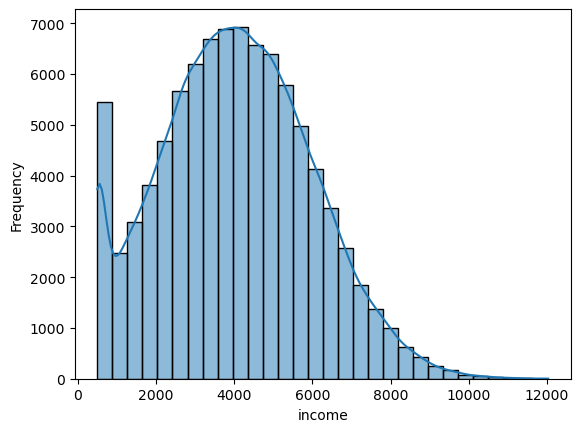

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['income'], bins=30, kde=True)  # kde=True adds a smooth curve
plt.xlabel("income")
plt.ylabel("Frequency")
plt.show()

In [12]:
original_income = df['income'].copy()

In [13]:
df['income']=original_income

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['income']] = imputer.fit_transform(df[['income']])

# common way  for replacing null in right skewed 
df['income'].fillna(df['income'].median(),inplace=True)

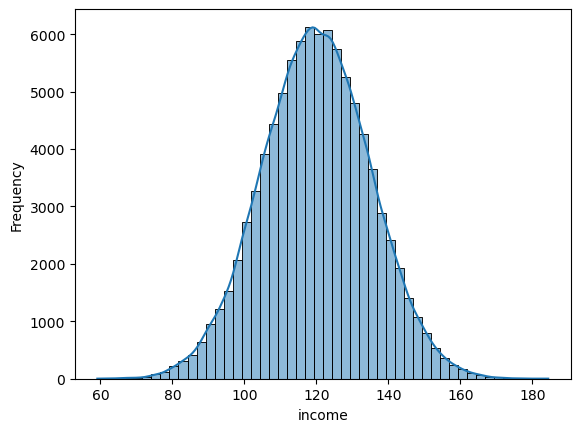

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['blood_pressure'], bins=50, kde=True)  # kde=True adds a smooth curve
plt.xlabel("income")
plt.ylabel("Frequency")
plt.show()

In [16]:
df['blood_pressure'].fillna(df['blood_pressure'].mean(),inplace=True)

C:\Users\vinays\AppData\Local\Temp\ipykernel_15472\526001246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['blood_pressure'].fillna(df['blood_pressure'].mean(),inplace=True)


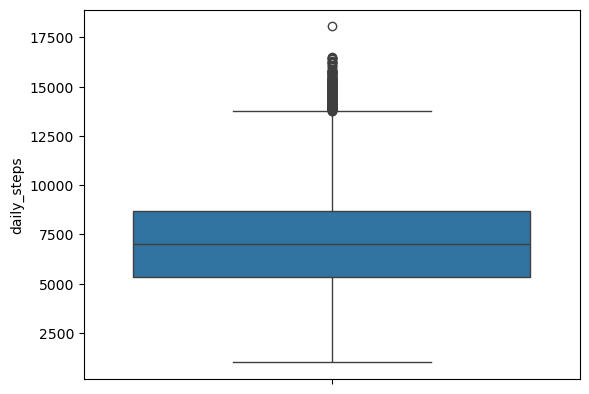

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df['daily_steps'])
plt.show()

In [18]:
org_heart=df['heart_rate'].copy()

In [19]:
df[['insulin', 'daily_steps']].corr()

,insulin,daily_steps
insulin,1.000000,0.000174
daily_steps,0.000174,1.000000


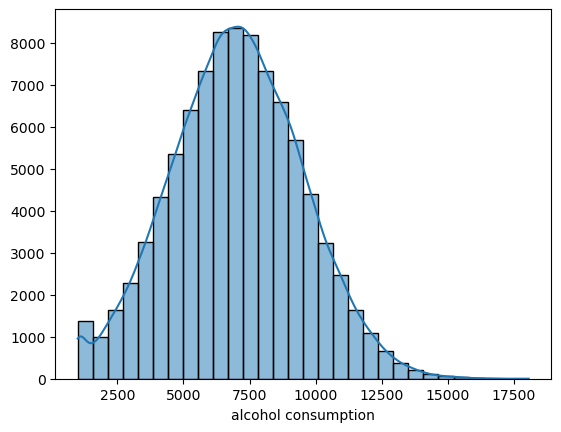

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['daily_steps'], bins=30, kde=True)  # kde=True adds a smooth curve
plt.xlabel("alcohol consumption")
plt.ylabel("")
plt.show()

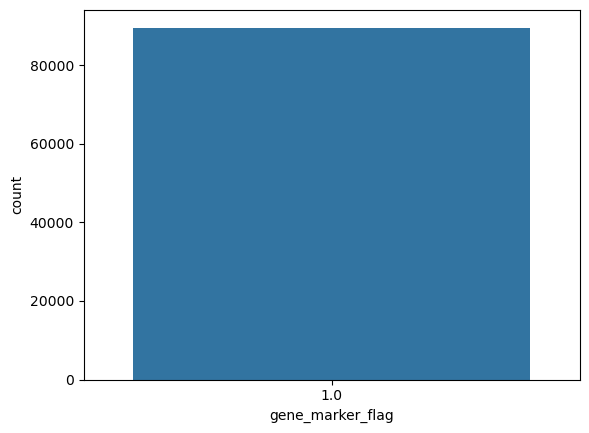

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='gene_marker_flag')
plt.show()


In [22]:
df['caffeine_intake'].fillna(df['caffeine_intake'].mode()[0], inplace=True)


C:\Users\vinays\AppData\Local\Temp\ipykernel_15472\682264245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['caffeine_intake'].fillna(df['caffeine_intake'].mode()[0], inplace=True)


In [23]:
df['gene_marker_flag'].fillna(0, inplace=True)


C:\Users\vinays\AppData\Local\Temp\ipykernel_15472\2743193235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gene_marker_flag'].fillna(0, inplace=True)


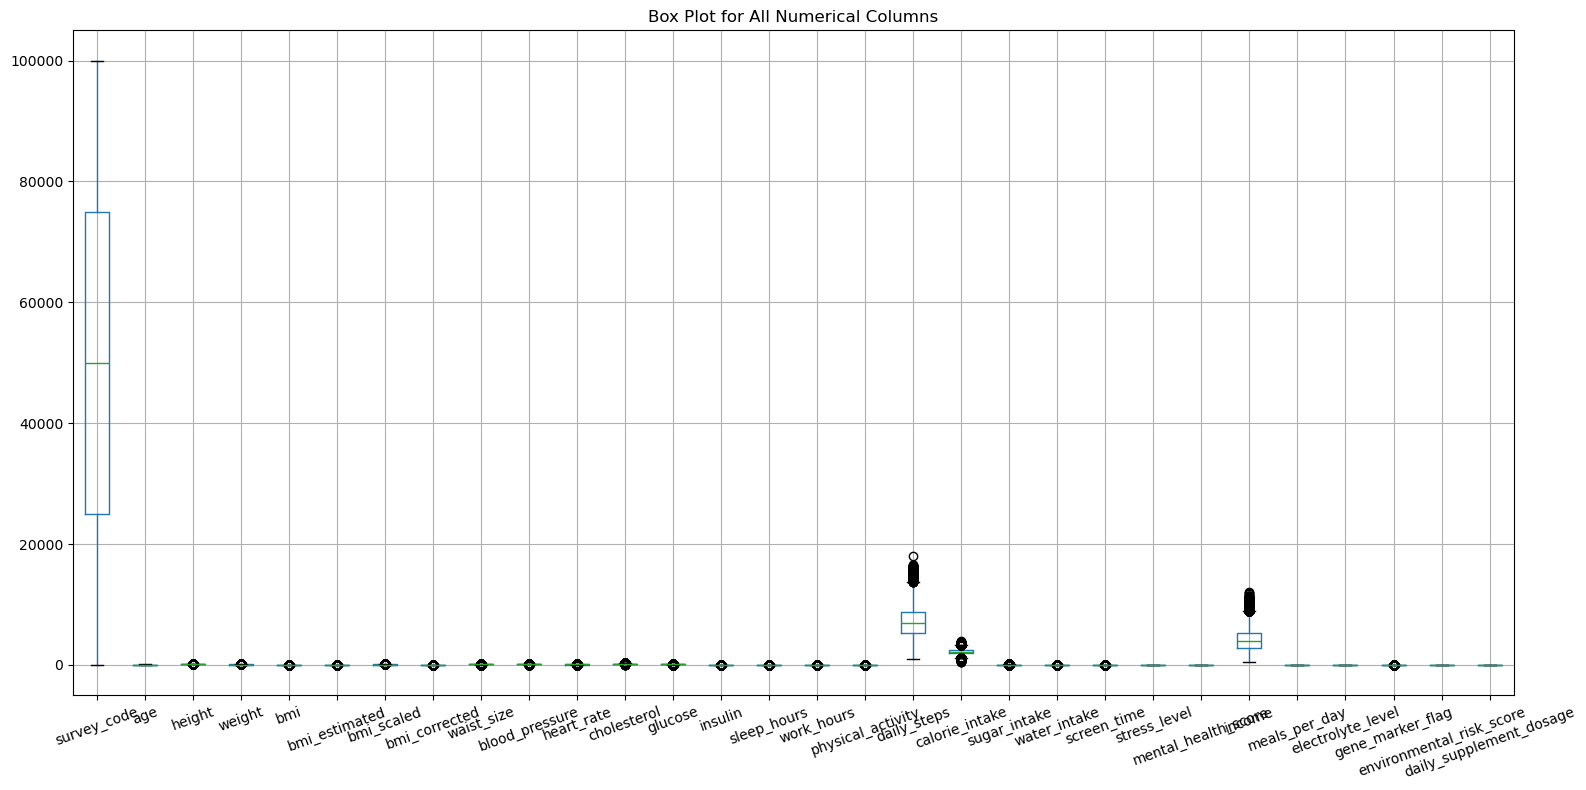

In [24]:
import matplotlib.pyplot as plt

# Adjust the size based on the number of columns
plt.figure(figsize=(16, 8))

# Plot boxplots for all numerical columns
df.boxplot(rot=20)  # rot=90 for better visibility of column names

plt.title('Box Plot for All Numerical Columns')
plt.tight_layout()
plt.show()


majority have no outliers but 1:daily_steps--> can be athelets 2: income-->rich presons

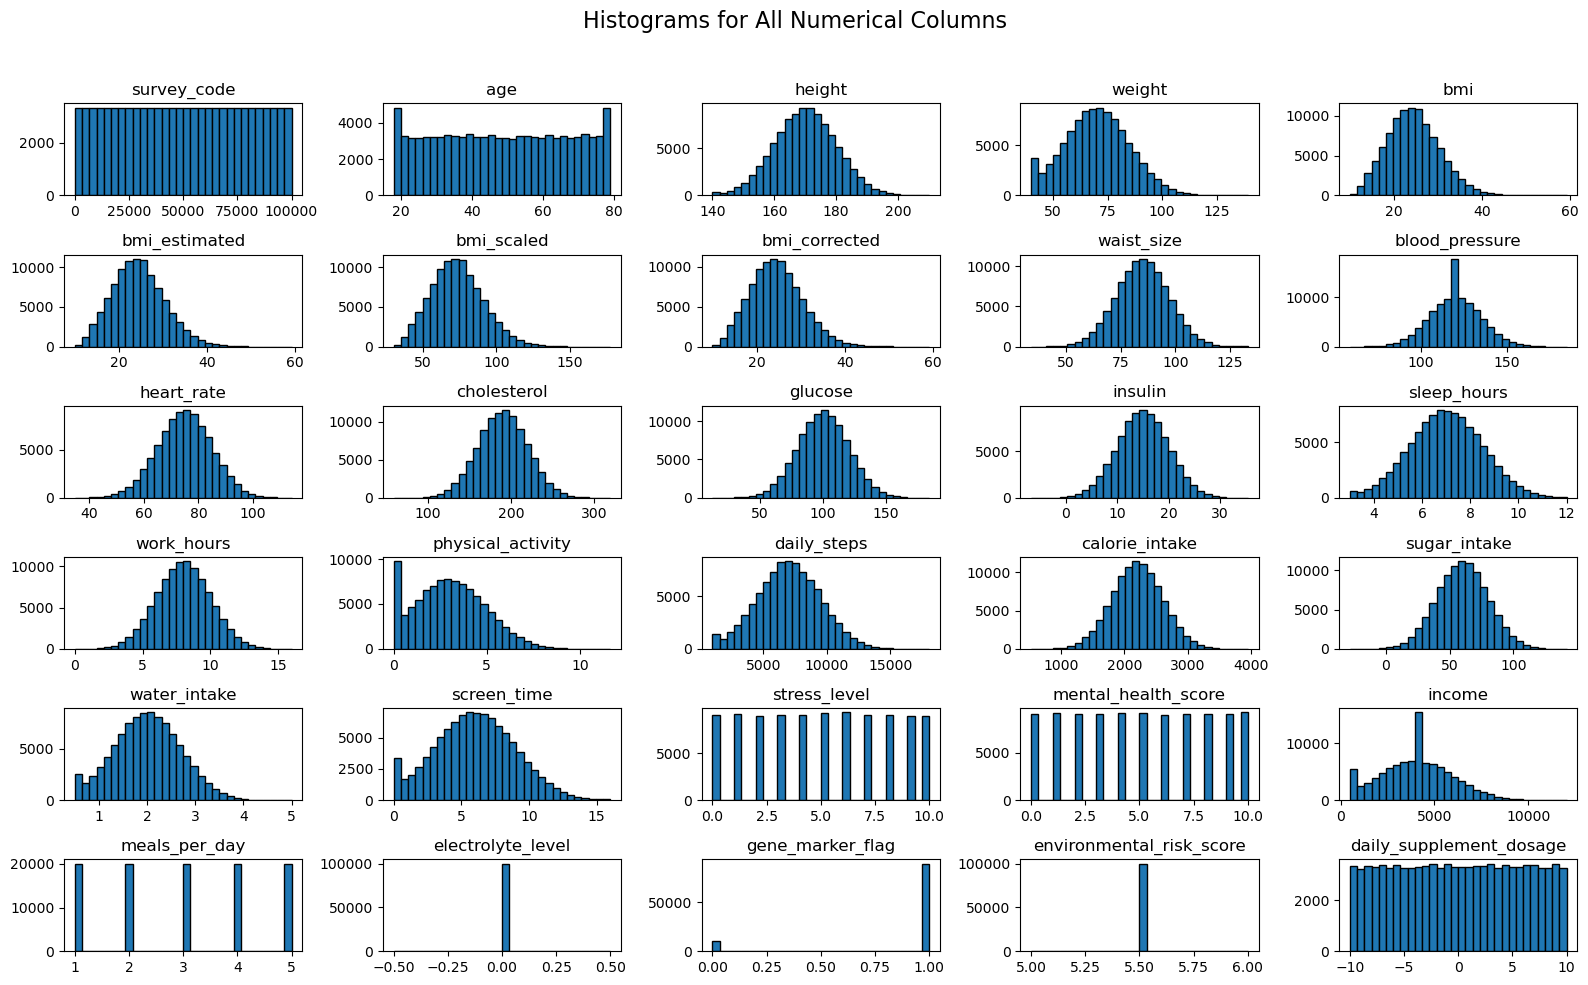

In [25]:
import matplotlib.pyplot as plt

# Set figure size to accommodate all histograms
df.hist(figsize=(16, 10), bins=30, edgecolor='black', grid=False)

plt.suptitle('Histograms for All Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle spacing
plt.show()


In [26]:
df.drop(columns=[
    'survey_code',        # ID, usually not useful
    'bmi_estimated',      # likely rough estimate
    'bmi_scaled',         # scaled version, drop unless for ML
    'bmi_corrected',      # keep only one of bmi or corrected
    'gene_marker_flag',   # redundant if you have the actual score
], inplace=True)


In [27]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a scaler
scaler = StandardScaler()

# Fit and transform
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [28]:
df.describe()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,...,sugar_intake,water_intake,screen_time,stress_level,mental_health_score,income,meals_per_day,electrolyte_level,environmental_risk_score,daily_supplement_dosage
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,8.599700e+04,1.000000e+05,1.000000e+05,8.416400e+04,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.0,100000.0,1.000000e+05
mean,-8.597567e-18,-1.339586e-15,-1.779910e-17,-5.098144e-16,-6.000533e-16,-7.940315e-17,2.075022e-15,-6.983214e-16,3.836931e-17,2.894885e-16,...,-4.374101e-16,2.145484e-16,3.760103e-16,-2.948752e-17,1.427836e-16,-1.304556e-16,-4.135359e-17,0.0,0.0,-6.217249e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000006e+00,1.000005e+00,1.000005e+00,1.000006e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.0,0.0,1.000005e+00
min,-1.706633e+00,-3.007559e+00,-2.046120e+00,-2.437454e+00,-4.222491e+00,-4.217581e+00,-4.046033e+00,-4.387849e+00,-4.381765e+00,-4.354150e+00,...,-4.403802e+00,-2.186747e+00,-2.052452e+00,-1.582133e+00,-1.581651e+00,-1.916157e+00,-1.412744e+00,0.0,0.0,-1.737478e+00
25%,-8.680197e-01,-6.728700e-01,-6.947193e-01,-7.095350e-01,-6.758876e-01,-6.352177e-01,-6.733059e-01,-6.770344e-01,-6.772417e-01,-6.718587e-01,...,-6.782713e-01,-6.886146e-01,-6.988181e-01,-9.482147e-01,-9.495824e-01,-6.726699e-01,-7.059197e-01,0.0,0.0,-8.667293e-01
50%,-2.940680e-02,-6.941031e-04,-9.577024e-03,-5.665262e-02,2.001282e-03,-9.849380e-16,7.748676e-03,2.606282e-03,-3.855267e-04,-9.682046e-04,...,3.706991e-05,-8.295578e-03,-1.034626e-02,2.662456e-03,-1.479041e-03,0.000000e+00,9.047352e-04,0.0,0.0,-2.376271e-05
75%,8.651137e-01,6.716801e-01,6.780204e-01,6.326324e-01,6.715531e-01,6.379877e-01,6.756186e-01,6.755958e-01,6.762932e-01,6.743627e-01,...,6.725792e-01,6.774530e-01,6.827086e-01,9.535396e-01,9.466243e-01,6.396543e-01,7.077291e-01,0.0,0.0,8.661173e-01
max,1.703727e+00,4.004538e+00,4.708585e+00,5.837790e+00,4.004948e+00,4.467582e+00,3.939690e+00,4.332937e+00,4.198076e+00,4.093044e+00,...,4.080151e+00,4.345738e+00,3.401188e+00,1.587458e+00,1.578693e+00,4.327868e+00,1.414554e+00,0.0,0.0,1.732034e+00


In [34]:
df.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,...,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,environmental_risk_score,daily_supplement_dosage,target
0,0.417853,1,0.339903,-0.896869,-0.937307,-1.060436,-0.118927,-1.430287,0.820968,0.150812,...,No,High,1.414554,Moderate,No,Yes,0.0,0.0,-0.397475,healthy
1,1.144651,0,-0.682811,1.887557,2.053827,0.055302,-0.142926,-0.855544,-2.473917,0.846261,...,No,High,1.414554,High,Yes,No,0.0,0.0,1.079653,healthy
2,-0.141222,1,0.727080,0.722948,0.198146,0.445338,0.214410,0.108034,-1.728771,-0.541179,...,Yes,High,0.707729,Moderate,No,No,0.0,0.0,0.938164,healthy
3,-0.923927,0,0.208114,-0.471089,-0.533587,1.293259,1.954045,-0.622353,0.435298,1.420290,...,No,High,-1.412744,Moderate,No,Yes,0.0,0.0,1.452501,healthy
4,0.641484,0,-0.642598,-2.046120,-1.604858,-1.321558,2.123140,1.746818,0.348412,-0.259284,...,Yes,High,-1.412744,High,Yes,Yes,0.0,0.0,0.054974,healthy


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['alcohol_consumption'] = le.fit_transform(df['alcohol_consumption'])

In [32]:
#df.drop(columns=['gender_encoded'])

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['education_level'] = le.fit_transform(df['education_level'])

similary encode all catogorical data

In [35]:
df.to_csv("half.csv",index=False)


In [36]:
from google.colab import files
files.download("half.csv")


ModuleNotFoundError: No module named 'google.colab'

In [37]:
import os
os.getcwd()



'C:\\Users\\vinays'

In [38]:
df=pd.read_csv(r"C:\Users\vinays\half.csv")

In [39]:
df.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,...,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,environmental_risk_score,daily_supplement_dosage,target
0,0.417853,1,0.339903,-0.896869,-0.937307,-1.060436,-0.118927,-1.430287,0.820968,0.150812,...,No,High,1.414554,Moderate,No,Yes,0.0,0.0,-0.397475,healthy
1,1.144651,0,-0.682811,1.887557,2.053827,0.055302,-0.142926,-0.855544,-2.473917,0.846261,...,No,High,1.414554,High,Yes,No,0.0,0.0,1.079653,healthy
2,-0.141222,1,0.727080,0.722948,0.198146,0.445338,0.214410,0.108034,-1.728771,-0.541179,...,Yes,High,0.707729,Moderate,No,No,0.0,0.0,0.938164,healthy
3,-0.923927,0,0.208114,-0.471089,-0.533587,1.293259,1.954045,-0.622353,0.435298,1.420290,...,No,High,-1.412744,Moderate,No,Yes,0.0,0.0,1.452501,healthy
4,0.641484,0,-0.642598,-2.046120,-1.604858,-1.321558,2.123140,1.746818,0.348412,-0.259284,...,Yes,High,-1.412744,High,Yes,Yes,0.0,0.0,0.054974,healthy


In [51]:
df.isnull().sum()

age                         0
gender                      0
height                      0
weight                      0
bmi                         0
waist_size                  0
blood_pressure              0
heart_rate                  0
cholesterol                 0
glucose                     0
insulin                     0
sleep_hours                 0
sleep_quality               0
work_hours                  0
physical_activity           0
daily_steps                 0
calorie_intake              0
sugar_intake                0
alcohol_consumption         0
smoking_level               0
water_intake                0
screen_time                 0
stress_level                0
mental_health_score         0
mental_health_support       0
education_level             0
job_type                    0
occupation                  0
income                      0
diet_type                   0
exercise_type               0
device_usage                0
healthcare_access           0
insurance 

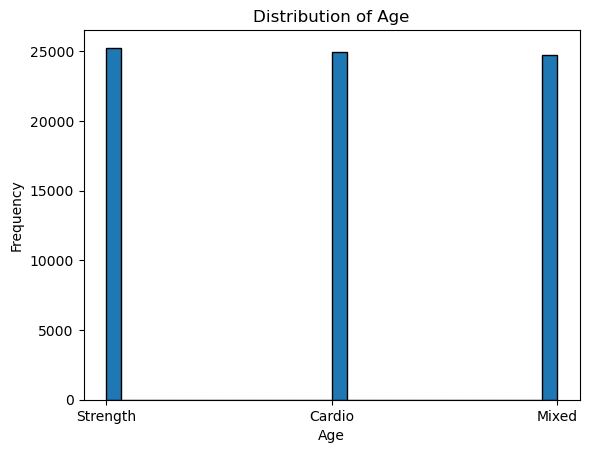

In [49]:
import matplotlib.pyplot as plt

# Replace 'age' with your desired column name
df['exercise_type'].hist(bins=30, edgecolor='black')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


In [50]:
df['exercise_type'].fillna(df['exercise_type'].mode()[0],inplace=True)

C:\Users\vinays\AppData\Local\Temp\ipykernel_15472\320224360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exercise_type'].fillna(df['exercise_type'].mode()[0],inplace=True)


In [52]:
df.head()

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,...,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,environmental_risk_score,daily_supplement_dosage,target
0,0.417853,1,0.339903,-0.896869,-0.937307,-1.060436,-0.118927,-1.430287,0.820968,0.150812,...,No,High,1.414554,Moderate,No,Yes,0.0,0.0,-0.397475,healthy
1,1.144651,0,-0.682811,1.887557,2.053827,0.055302,-0.142926,-0.855544,-2.473917,0.846261,...,No,High,1.414554,High,Yes,No,0.0,0.0,1.079653,healthy
2,-0.141222,1,0.727080,0.722948,0.198146,0.445338,0.214410,0.108034,-1.728771,-0.541179,...,Yes,High,0.707729,Moderate,No,No,0.0,0.0,0.938164,healthy
3,-0.923927,0,0.208114,-0.471089,-0.533587,1.293259,1.954045,-0.622353,0.435298,1.420290,...,No,High,-1.412744,Moderate,No,Yes,0.0,0.0,1.452501,healthy
4,0.641484,0,-0.642598,-2.046120,-1.604858,-1.321558,2.123140,1.746818,0.348412,-0.259284,...,Yes,High,-1.412744,High,Yes,Yes,0.0,0.0,0.054974,healthy


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['insurance'] = le.fit_transform(df['insurance'])

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sleep_quality'] = le.fit_transform(df['sleep_quality'])

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [72]:
df.isnull().sum()

age                         0
gender                      0
height                      0
weight                      0
bmi                         0
waist_size                  0
blood_pressure              0
heart_rate                  0
cholesterol                 0
glucose                     0
insulin                     0
sleep_hours                 0
sleep_quality               0
work_hours                  0
physical_activity           0
daily_steps                 0
calorie_intake              0
sugar_intake                0
alcohol_consumption         0
smoking_level               0
water_intake                0
screen_time                 0
stress_level                0
mental_health_score         0
mental_health_support       0
education_level             0
job_type                    0
occupation                  0
income                      0
diet_type                   0
exercise_type               0
device_usage                0
healthcare_access           0
insurance 

In [73]:
df.to_csv("transformed.csv",index=False)